# Libraries

In [64]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data processing

In [65]:
dataset = pd.read_csv('Frogs_MFCCs.csv')
dataset.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [66]:
inputs = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species']
output = ['RecordID']

X = dataset[inputs].to_numpy()
X = OrdinalEncoder().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

Y = dataset[output].to_numpy().ravel()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Linear SVM

In [67]:
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

Y_train_pred = clf.predict(X_train)
print(f'Train accuracy: {accuracy_score(Y_train, Y_train_pred)}')

Y_test_pred = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(Y_test, Y_test_pred)}')

print(f'Number of support vectors per class: {clf.n_support_}')

Train accuracy: 0.8733121525019857
Test accuracy: 0.8596572487262621
Number of support vectors per class: [ 31  34  13  50  12  26   9  53  29  41  59  16  53  92 160  57  83 110
 172 187 137 163 175 101  22   9  31  38   6  18  18  23   4  20  27  97
  71  40  10 220 205 221  67  10  19  17  47   3  34  38  10   6  25   2
   1  22  13  24  15   9]


# Soft SVM

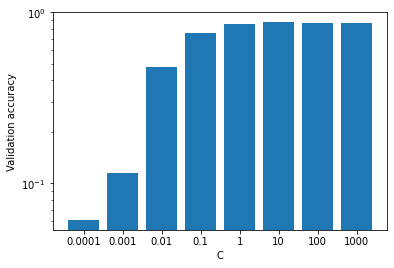

Number of support vectors per class: [ 24  29  12  32   9  20   8  56  26  26  50  15  48  61 109  44  61  81
 118 164  97 114 136  62  19   6  30  36   6  18  18  18   4  15  23  77
  64  30  10 203 186 180  67  10  18  15  34   3  29  36  10   6  22   2
   1  19  12  23  12   9]


In [68]:
c_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc = []

for i in c_range:
  clf = SVC(C=i, kernel='linear')
  clf.fit(X_train, Y_train)

  Y_test_pred = clf.predict(X_test)
  acc.append(accuracy_score(Y_test, Y_test_pred))

plt.figure()
plt.bar([str(i) for i in c_range], acc)
plt.xlabel('C')
plt.ylabel('Validation accuracy')
plt.yscale('log')
plt.show()

clf = SVC(C=10, kernel='linear')
clf.fit(X_train, Y_train)

print(f'Number of support vectors per class: {clf.n_support_}')

# Non Linear SVM

RBF kernel

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)

Y_train_pred = clf.predict(X_train)
print(f'Train accuracy: {accuracy_score(Y_train, Y_train_pred)}')

Y_test_pred = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(Y_test, Y_test_pred)}')

print(f'Number of support vectors per class: {clf.n_support_}')

Train accuracy: 0.8880063542494043
Test accuracy: 0.8707735062528948
Number of support vectors per class: [ 31  37  17  50  17  33  11  43  26  45  63  17  47 100 130  50  83 129
 185 200 137 169 175 101  22   9  26  40   4  18  17  18   4  19  23  89
  72  35   8 224 211 199  75  11  20  16  47   3  40  36   8   7  21   1
   1  22  15  24  14   9]


Polynomial kernel

In [ ]:
clf = SVC(kernel='poly')
clf.fit(X_train, Y_train)

Y_train_pred = clf.predict(X_train)
print(f'Train accuracy: {accuracy_score(Y_train, Y_train_pred)}')

Y_test_pred = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(Y_test, Y_test_pred)}')

print(f'Number of support vectors per class: {clf.n_support_}')

Train accuracy: 0.9473788721207307
Test accuracy: 0.8911533117183882
Number of support vectors per class: [ 20  25  14  35   9  24  10  35  25  31  54   8  50  55  88  39  55  93
 108 161  85 103 137  56  18   6  24  34   4  18  16  15   4  14  18  75
  48  24   8 192 171 138  73   9  17  14  36   3  30  33   8   7  14   1
   1  16  12  23  12   6]


# Soft SVM & Non Linear SVM

In [ ]:
clf = SVC(C=10, kernel='poly')
clf.fit(X_train, Y_train)

Y_train_pred = clf.predict(X_train)
print(f'Train accuracy: {accuracy_score(Y_train, Y_train_pred)}')

Y_test_pred = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(Y_test, Y_test_pred)}')

print(f'Number of support vectors per class: {clf.n_support_}')

Train accuracy: 0.9795472597299444
Test accuracy: 0.8994905048633627
Number of support vectors per class: [ 20  23  11  36   9  24  10  35  25  28  53   8  50  50  89  38  48  92
 102 150  81  97 121  50  18   6  25  37   4  18  15  15   4  14  17  70
  48  26   8 168 164 112  74   9  17  14  35   3  29  33   8   7  15   1
   1  16  12  22  12   6]


# Soft margins, Poly kernel, 4 Fold

In [ ]:
folds = KFold(4, shuffle=True)

In [ ]:
valids = []
trains = []

for i, (train, test) in enumerate(folds.split(X, Y)):
  print(f'Fold: {i}')

  clf = SVC(C=10, kernel='poly')
  clf.fit(X[train], Y[train])

  Y_train_pred = clf.predict(X[train])
  acc = accuracy_score(Y[train], Y_train_pred)
  trains.append(acc)
  print(f'  Train accuracy: {acc}')


  Y_test_pred = clf.predict(X[test])
  acc = accuracy_score(Y[test], Y_test_pred)
  valids.append(acc)
  print(f'  Test accuracy: {acc}')

print(f'Mean train: {sum(trains) / len(trains)}')
print(f'Mean train: {sum(valids) / len(valids)}')

Fold: 0
  Train accuracy: 0.9799851742031134
  Test accuracy: 0.8882712618121178
Fold: 1
  Train accuracy: 0.9797998517420311
  Test accuracy: 0.8943857698721512
Fold: 2
  Train accuracy: 0.9812824314306894
  Test accuracy: 0.8854919399666481
Fold: 3
  Train accuracy: 0.9798035945895868
  Test accuracy: 0.8898776418242491
Mean train: 0.9802177629913551
Mean train: 0.8895066533687915
[ 25  25  11  27   8  21  10  48  28  30  50  11  50  54  80  41  61  94
 118 137  79 104 128  49  20   8  27  37   4  18  15  12   6  13  24  54
  55  28   6 179 174 119  73   7  15  18  34   3  30  32   8   6  17   2
   1  18  13  20  13   8]
